# Ivan Zepeda
## C0883949
inclass activity - 1


- Beginning Questions

### 1- **Clustering algorithms can be classified in different ways mention some of these categories and briegly explain each**  

    Partition-based Clustering:
Partition-based clustering algorithms aim to partition the dataset into distinct non-overlapping clusters. Examples include k-means, k-medoids (PAM), and fuzzy c-means. These algorithms typically require the number of clusters to be predefined.

    Hierarchical Clustering:
Hierarchical clustering algorithms create a hierarchical decomposition of the dataset by recursively dividing or merging clusters. They can be agglomerative (bottom-up) or divisive (top-down). Agglomerative algorithms start with each instance as a separate cluster and merge them iteratively, while divisive algorithms begin with one cluster containing all instances and split them recursively.

    Density-based Clustering:
Density-based clustering algorithms group instances based on their density in the data space. They identify regions of high density as clusters and separate them by regions of low density. Density-based spatial clustering of applications with noise (DBSCAN) and OPTICS are common density-based algorithms.

    Model-based Clustering:
Model-based clustering algorithms assume that the data is generated from a mixture of probability distributions. These algorithms estimate the parameters of the distribution(s) to identify clusters. Gaussian mixture models (GMM) and expectation-maximization (EM) algorithm are popular model-based clustering methods.

    Subspace Clustering:
Subspace clustering algorithms handle datasets where clusters exist in subspaces of the feature space. They aim to find clusters that are not necessarily present in all dimensions but rather in specific subsets of dimensions. Examples include CLIQUE and subspace clustering based on density (SCDBSCAN).

    Spectral Clustering:
Spectral clustering algorithms use the eigenvectors of a similarity matrix or Laplacian matrix to perform clustering. They convert the clustering problem into a graph partitioning problem, where instances are nodes and edges represent the similarity between instances. Spectral clustering can be effective for non-convex and nonlinear clusters.

    Constraint-based Clustering:
Constraint-based clustering algorithms incorporate domain knowledge or user-defined constraints during the clustering process. These constraints can enforce or prohibit certain instances from being grouped together. COBWEB and ROCK are examples of constraint-based clustering algorithms.

### 2- **How many steps are involved in applying kmeans clustering? Explain Each**  

    Step 1: Initialization

Randomly select K cluster centers (centroids) from the dataset, where K is the predefined number of clusters.
Alternatively, the initial centroids can be chosen using other heuristics like k-means++.

    Step 2: Assignment

For each instance in the dataset, calculate the distance between the instance and each centroid.
Assign the instance to the nearest centroid, forming K clusters.

    Step 3: Update

Recalculate the centroids of the clusters by taking the mean (average) of the instances belonging to each cluster.
This step aims to find new cluster centers that better represent the data.
    
    Step 4: Convergence Check

Check if the algorithm has converged by comparing the new centroids with the previous centroids.
If the centroids have not changed significantly or the maximum number of iterations is reached, the algorithm terminates.
Otherwise, go back to Step 2 and repeat the assignment and update steps.
    
    Step 5: Output

Once the algorithm converges, the final clusters and their corresponding centroids are obtained.
The algorithm assigns each instance to one of the K clusters, and the centroids represent the center of each cluster.
The resulting clusters can be analyzed and interpreted based on the problem domain.

### 3- **Mention 3 methods for specifying k in kmeans**  

    Elbow Method:

The elbow method is a heuristic approach to estimate the optimal k value by analyzing the relationship between the number of clusters and the within-cluster sum of squares (WCSS).
In this method, you perform k-means clustering for a range of k values and calculate the WCSS for each clustering result.
Plot the WCSS against the number of clusters and look for the "elbow" point in the plot, which is the point where the reduction in WCSS starts to diminish significantly.
The k value corresponding to the elbow point is often considered a reasonable choice for the number of clusters.
    
    Silhouette Coefficient:

The silhouette coefficient is a measure of how well instances belong to their assigned cluster compared to other clusters.
For different values of k, calculate the average silhouette coefficient across all instances in the dataset.
The value of k that maximizes the average silhouette coefficient is considered a good choice for the number of clusters.
A higher silhouette coefficient indicates better-defined clusters with instances that are close to their own cluster and far from other clusters.
    
    Domain Knowledge or Prior Information:

In some cases, domain knowledge or prior information about the data can help determine the appropriate number of clusters.
For instance, if you are working with customer segmentation data and have information about distinct customer groups or segments, you can choose k accordingly.
Prior knowledge can be obtained from subject-matter experts, historical data, or existing research on similar problems.
However, it's important to validate and evaluate the chosen k value using appropriate metrics and techniques.


### 4- **How can random initialization affect the performance of kmeans**  

    Random initialization can significantly affect the performance of the k-means clustering algorithm. Here are a few ways in which random initialization can impact the results:

- Convergence to Local Optima:

K-means aims to minimize the within-cluster sum of squares (WCSS) by iteratively updating the centroids. However, the algorithm can get stuck in local optima.
Random initialization affects the starting points of the centroids, and different initializations can lead to different final clustering results.
If the initial centroids are poorly chosen, the algorithm may converge to a suboptimal clustering solution that does not accurately represent the underlying structure of the data.

- Sensitivity to Outliers:

Random initialization can make the algorithm sensitive to outliers or noise in the dataset.
If an initial centroid is randomly placed near an outlier, it can attract instances that do not belong to the main clusters, leading to distorted cluster boundaries and inaccurate results.
Reproducibility:

Random initialization affects the randomness and variability of the clustering results.
Running the k-means algorithm multiple times with different initializations may produce different clustering outcomes.
The lack of reproducibility can make it challenging to compare and interpret results across different runs or when working with collaborative research or production environments.
To mitigate the issues associated with random initialization, several techniques can be employed:

- K-means++ Initialization:

K-means++ is a modified initialization method that aims to select initial centroids that are more spread out and representative of the data distribution.
It reduces the chances of getting stuck in poor local optima by biasing the selection of initial centroids towards points that are far apart from each other.

- Multiple Random Initializations:

Running the k-means algorithm multiple times with different random initializations and selecting the best clustering solution based on a chosen criterion, such as the lowest WCSS or highest silhouette coefficient.
This approach helps mitigate the impact of random initialization and increases the likelihood of finding a better clustering solution.

- Seed Control:

Setting a specific seed value for the random number generator used in initialization allows for reproducibility.
By using the same seed value across different runs, the same initializations can be generated, resulting in consistent clustering results.
By employing appropriate techniques and considering the impact of random initialization, it is possible to improve the stability and reliability of k-means clustering.

# IN CLASS ASSIGNMETN 4 PART A

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [14]:
df_raw = pd.read_csv('train.csv')

In [12]:
# salePrice , lotArea
df_raw.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [82]:
# df = df_raw.select_dtypes(include='number')

df = df_raw[['SalePrice','LotArea']]

df.head()

,SalePrice,LotArea
0,208500,8450
1,181500,9600
2,223500,11250
3,140000,9550
4,250000,14260


In [80]:
# Create a blob of 200 data points

dataset = make_blobs(n_samples = 200, 
                    n_features= 2,
                    centers=4,
                    cluster_std=1.6,
                    random_state=50)

points = dataset[0]


In [50]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering


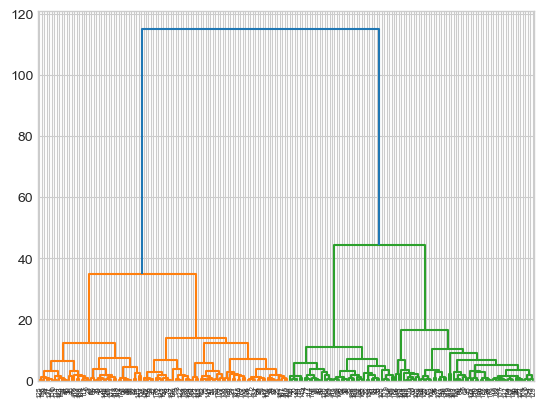

In [51]:
dendrogram = sch.dendrogram(sch.linkage(points, method='ward'))

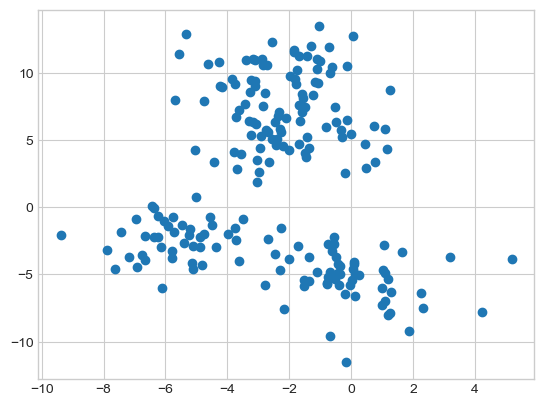

In [52]:
plt.scatter(dataset[0][:,0], dataset[0][:,1])

In [53]:
# Perform the actual clustering
hc= AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage='ward')


In [54]:
y_hc = hc.fit_predict(points)

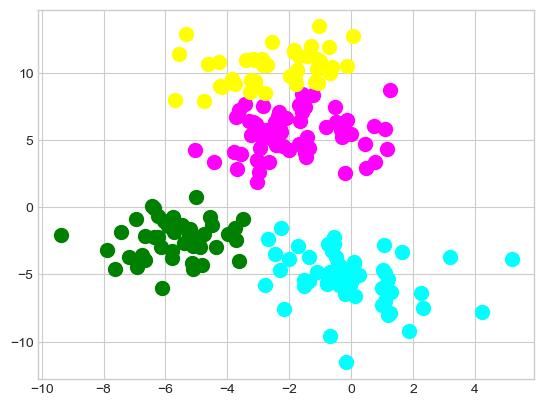

In [83]:
plt.scatter(points[y_hc == 0,0], points[y_hc == 0,1], s=100, c='cyan')
plt.scatter(points[y_hc == 1,0], points[y_hc == 1,1], s=100, c='magenta')
plt.scatter(points[y_hc == 2,0], points[y_hc == 2,1], s=100, c='green')
plt.scatter(points[y_hc == 3,0], points[y_hc == 3,1], s=100, c='yellow')

#Centroids


# Second video


## Hierarchical Clustering`
Distances Metrics: Euclidean, Manhattan, Cosine  
Linkage Parametes: Ward, Completer, Average



In [35]:
import numpy as np
import scipy
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import cophenet
# from scipy.spatial.distance import dist

from pylab import rcParams
import seaborn as sb
import matplotlib.pyplot as plt

import sklearn 
from sklearn.cluster import AgglomerativeClustering
import sklearn.metrics as sm

In [38]:
np.set_printoptions(precision=4, suppress = True)
plt.figure(figsize=(10,3))
%matplotlib inline
plt.style.use('seaborn-whitegrid')



In [69]:
df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [74]:
cols

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [77]:
cols=df.columns
Y=df['SalePrice']
cols.remove('SalePrice')
X= df[cols]

Z = linkage(X, 'ward')

AttributeError: 'Index' object has no attribute 'remove'

In [60]:

X = np.array([df['LotArea'], df['SalePrice']]).T
Z = linkage(X, 'ward')

In [61]:
dendrogram(Z, truncate_mode = 'lastp', p=12, leaf_rotation=45., leaf_font_size=15., show_concatenated=True )
plt.title("Truncated Hierarchical Clustering dendrogram")
plt.xlabel('Cluster Size')
plt.ylabel("Distance")
plt.axhline(y=500)
plt.axhline(y=150)

plt.show()

TypeError: 'dict' object is not callable